In [1]:
# Create a model to predict the probability of a tumor being benign/malignant based on the historical medical data 
# Credentials - kasham1991@gmail.com / karan sharma

# The original dataset is on UCI Machine Learning Repository and Kaggle
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Attribute Information:

# 1) ID number
# 2) Diagnosis (M = malignant, B = benign)
# 3-32)

# Ten real-valued features are computed for each cell nucleus:

# a) radius (mean of distances from center to points on the perimeter)
# b) texture (standard deviation of gray-scale values)
# c) perimeter
# d) area
# e) smoothness (local variation in radius lengths)
# f) compactness (perimeter^2 / area - 1.0)
# g) concavity (severity of concave portions of the contour)
# h) concave points (number of concave portions of the contour)
# i) symmetry
# j) fractal dimension ("coastline approximation" - 1)

# The mean, standard error and "worst" or largest (mean of the three
# largest values) of these features were computed for each image,
# resulting in 30 features. For instance, field 3 is Mean Radius, field
# 13 is Radius SE, field 23 is Worst Radius.

# All feature values are recoded with four significant digits.

# Missing attribute values: none

# Class distribution: 357 benign, 212 malignant

In [2]:
# Importing the required libraries
# Loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv("C://Datasets//cancertype.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# dataset.info()
# Diagnosis is categorical
# dataset['diagnosis'].value_counts().sum()
# 212 - Malignant, and 357 - Benign; class imbalance is suitable
print(dataset['diagnosis'].value_counts())
print(dataset['diagnosis'].value_counts(normalize = True))

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


In [4]:
# Looking at the basic statistics
# What is this Unnameed: 32 column with NaN values?
# Features must be standardized into a common scale
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Removing the Id and Unnamed: 32
dataset.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [6]:
# Looking for null values
# No null/missing values!
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

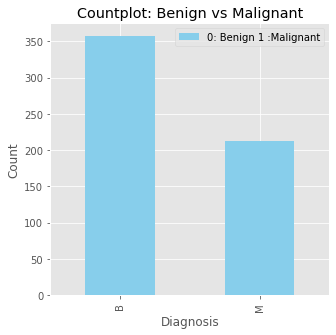

In [7]:
# Lets do some visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')


# Diagnosis
plt.figure(figsize = (5, 5))
dataset['diagnosis'].value_counts().plot(kind = 'bar', color = 'skyblue', label ='0: Benign 1 :Malignant')
plt.title("Countplot: Benign vs Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend()
plt.show()

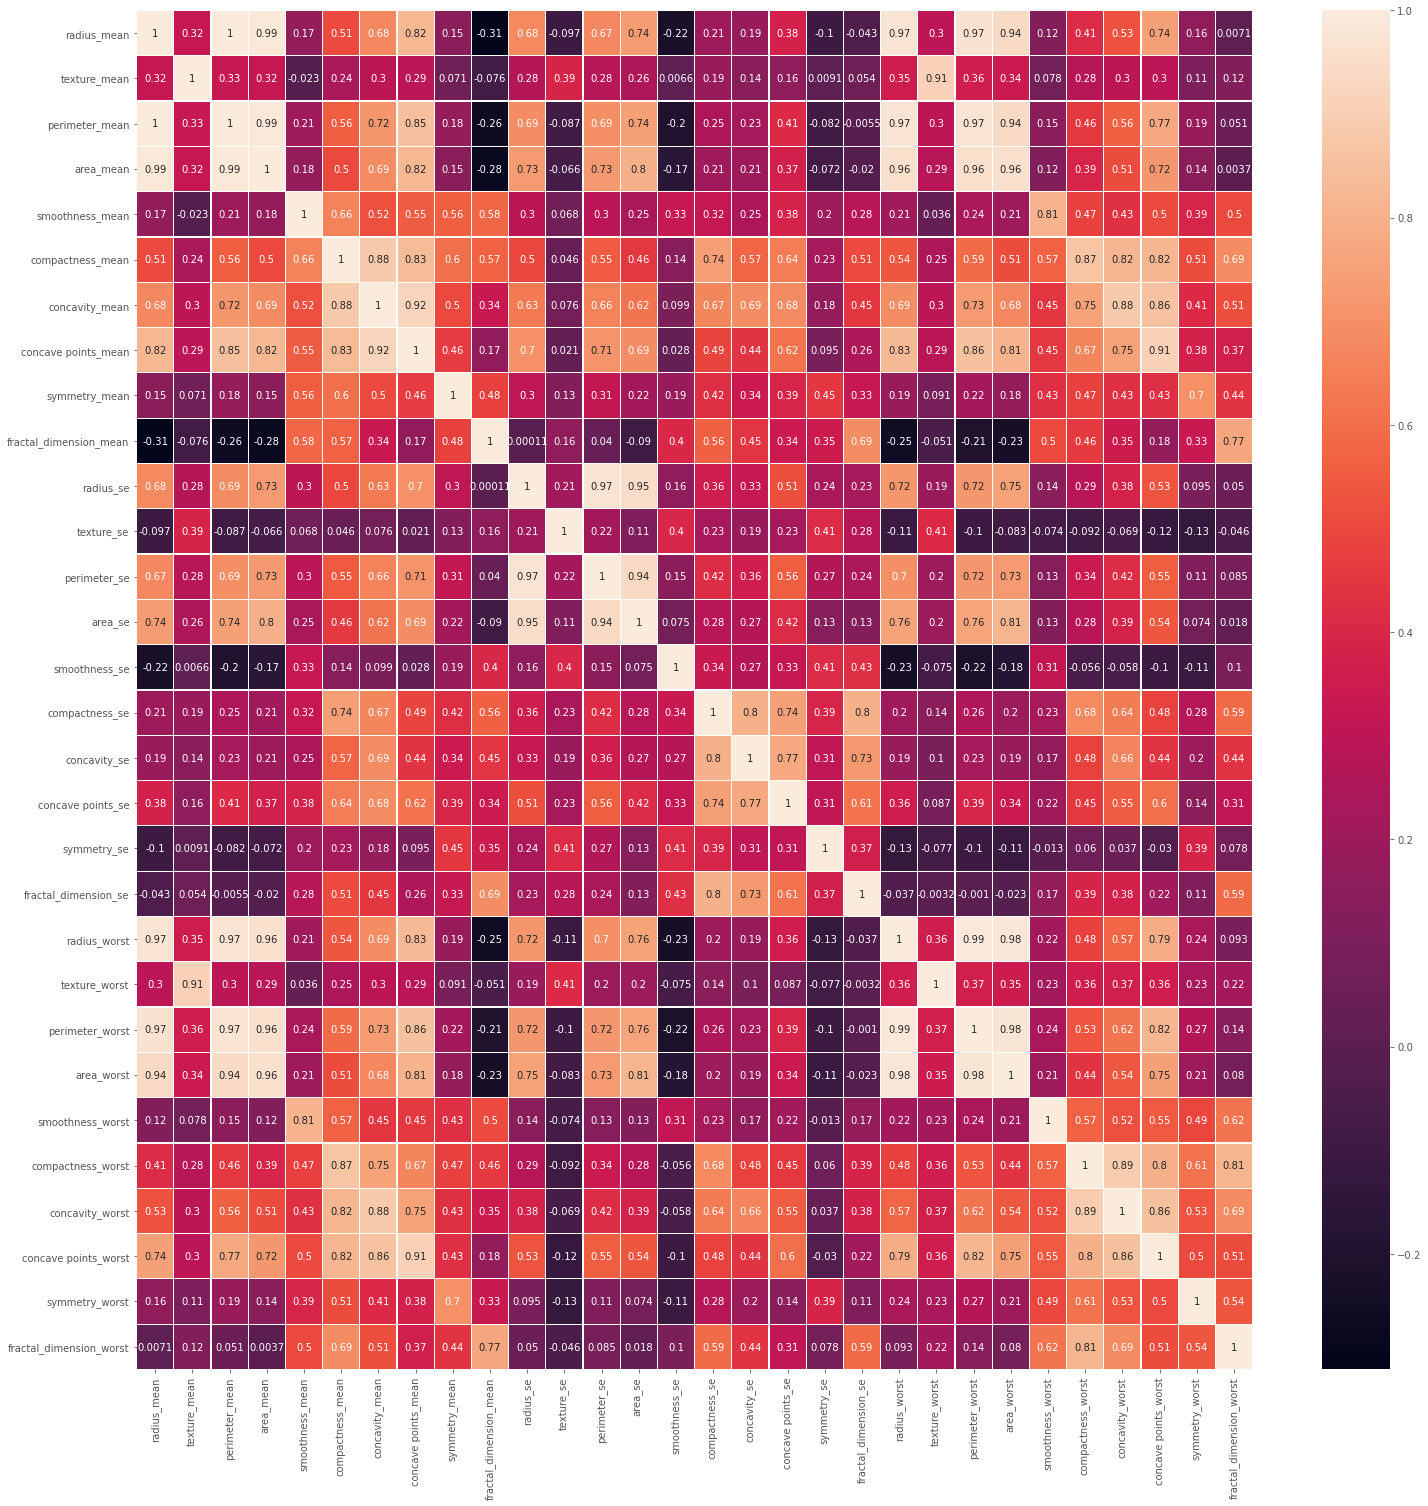

In [8]:
# Since there are 33 features, let check for multicollinearity
# Let us use heatmap function
plt.figure(figsize = (25, 25))
sns.heatmap(dataset.corr(), annot = True, linewidths = 0.20)

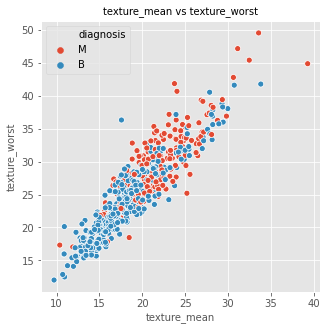

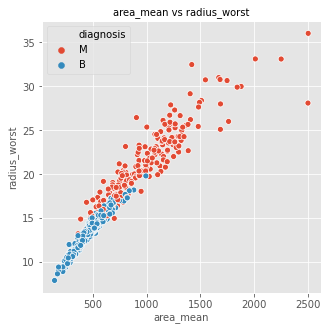

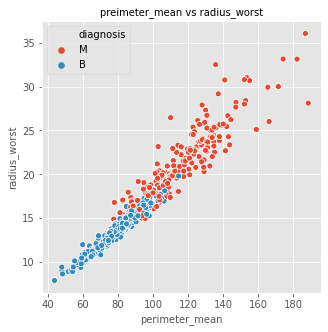

In [9]:
# The highly corelated pairs are:  
# texture_mean & texture_worst
# area_mean & radius_worst
# perimeter_mean and radius_worst

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'texture_mean', y ='texture_worst', hue = 'diagnosis', data = dataset)
plt.xlabel('texture_mean', fontsize = 10)
plt.ylabel('texture_worst', fontsize = 10)
plt.title('texture_mean vs texture_worst', fontsize = 10)
plt.show()


plt.figure(figsize = (5,5))
sns.scatterplot(x = 'area_mean', y = 'radius_worst', hue = 'diagnosis', data = dataset)
plt.xlabel('area_mean', fontsize = 10)
plt.ylabel('radius_worst', fontsize = 10)
plt.title('area_mean vs radius_worst', fontsize = 10)
plt.show()

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'perimeter_mean', y = 'radius_worst', hue = 'diagnosis', data = dataset)
plt.xlabel('perimeter_mean', fontsize = 10)
plt.ylabel('radius_worst', fontsize = 10)
plt.title('preimeter_mean vs radius_worst', fontsize = 10)
plt.show()

In [10]:
# Encoding categorical data column diagnosis
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dataset['diagnosis'] = encode.fit_transform(dataset['diagnosis'])
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Model Building
# But first, lets standardize the dataset and import the libraries

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [12]:
# Creating and splitting the dataset
x = dataset.drop('diagnosis', axis = 1)
y = dataset['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
# Standardizing the data involes moving each datapoint to a distribution of mean = 0 and SD = 1
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
y_log_predict = logmodel.predict(x_test)
# y_log_predict
print('Accuracy of Logistic Regression: {}'.format(accuracy_score(y_test, y_log_predict)))
print("Confusion Matrix for Logistic regression\n\n", confusion_matrix(y_test, y_log_predict, labels=[0, 1]))
print(classification_report(y_test, y_log_predict)) 

Accuracy of Logistic Regression: 0.9707602339181286
Confusion Matrix for Logistic regression

 [[107   1]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [15]:
# KNN Classifier
knnmodel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnmodel.fit(x_train, y_train)
y_knn_predict = knnmodel.predict(x_test)
print('Accuracy of Logistic KNN: {}'.format(accuracy_score(y_test, y_knn_predict)))
print("Confusion Matrix for KNN\n\n", confusion_matrix(y_test, y_knn_predict, labels=[0, 1]))
print(classification_report(y_test, y_knn_predict)) 

Accuracy of Logistic KNN: 0.9590643274853801
Confusion Matrix for KNN

 [[107   1]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [16]:
# Xtreme gradient boosting
XGBmodel = XGBClassifier() 
XGBmodel.fit(x_train, y_train)
y_XGB_predict = XGBmodel.predict(x_test)
print('Accuracy of XGB Model: {}'.format(accuracy_score(y_test, y_XGB_predict)))
print("Confusion Matrix for XGB Model\n\n", confusion_matrix(y_test, y_XGB_predict, labels=[0, 1]))
print(classification_report(y_test, y_XGB_predict)) 

Accuracy of XGB Model: 0.9824561403508771
Confusion Matrix for XGB Model

 [[107   1]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [17]:
# Gradient Boosting
GBmodel = GradientBoostingClassifier()
GBmodel.fit(x_train, y_train)
y_GB_predict = GBmodel.predict(x_test)
print('Accuracy of Gradient Boosting: {}'.format(accuracy_score(y_test, y_GB_predict)))
print("Confusion Matrix for Gradient Boosting\n\n", confusion_matrix(y_test, y_GB_predict, labels=[0, 1]))
print(classification_report(y_test, y_GB_predict)) 

Accuracy of Gradient Boosting: 0.9590643274853801
Confusion Matrix for Gradient Boosting

 [[105   3]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [18]:
# Randomn Forest
rfmodel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfmodel.fit(x_train, y_train)
y_rfmodel_predict = rfmodel.predict(x_test)
print('Accuracy of Randomn Forest: {}'.format(accuracy_score(y_test, y_rfmodel_predict)))
print("Confusion Matrix for Random Forest\n\n", confusion_matrix(y_test, y_rfmodel_predict, labels=[0, 1]))
print(classification_report(y_test, y_rfmodel_predict)) 

Accuracy of Randomn Forest: 0.9649122807017544
Confusion Matrix for Random Forest

 [[107   1]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [19]:
# Support Vector Machine
supmodel = SVC(probability = True)
supmodel.fit(x_train, y_train)
y_supmodel_predict = supmodel.predict(x_test)
print('Accuracy of SVM: {}'.format(accuracy_score(y_test, y_supmodel_predict)))
print("Confusion Matrix for SVC\n\n", confusion_matrix(y_test, y_supmodel_predict, labels=[0, 1]))
print(classification_report(y_test, y_supmodel_predict)) 

Accuracy of SVM: 0.935672514619883
Confusion Matrix for SVC

 [[108   0]
 [ 11  52]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [20]:
# Thank You :) 